In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert_copy.csv' , sep=',')

KeyboardInterrupt: 

In [ ]:
len(df)

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
df_bla = df.iloc[0:40000]
df_bla['alerte_temp_C1']

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('../../datas/E4_3/E3_all_alert.csv', sep=',', low_memory=False)
df['anomalie'] = 0
df = df[df['datetime'] >= '2025-06-13 00:00:00']
df = df[df['datetime'] <= '2025-06-16 03:00:00']
df['anomalie'] = 1
plt.figure(figsize=(10, 6))
#plt.plot(df['TEMPERATURE_REPRISE [R]'], label="TEMPERATURE_REPRISE", color="yellow")
#plt.plot(df['TEMPERATURE_CONSIGNE [R]'], label="TEMPERATURE_CONSIGNE", color="green")
plt.plot(df['TEMPERATURE_MEG_FROID [R]_C4'], label="Ecart", color="purple")
plt.plot(df['CONSIGNE_BALLON_FROID [R]_C4'], label="alterte", color="red", linestyle="dashed")
#plt.plot(df['DEFAUT_COMPRESSEUR_2 [B]_C4'], label="alterte", color="green", linestyle="dashed")
plt.legend()
plt.show()

In [23]:
df['anomalie'] = 0
df.loc[
    (df['TEMPERATURE_MEG_FROID [R]_C4'] == 0) & (df['TEMPERATURE_MEG_CHAUD [R]_C4'] == 0),
    'anomalie'
] = 1


In [4]:
len(df)

891762

In [17]:
df['anomalie'] = 0

mask = (df['datetime'] >= '2025-06-13 15:17:00') & (df['datetime'] <= '2025-06-13 15:20:00')
mask_2 = (df['datetime'] >= '2025-06-13 15:47:00') & (df['datetime'] <= '2025-06-13 15:51:00')
df.loc[mask, 'anomalie'] = 1


In [ ]:
df.columns

In [ ]:
len(df)

In [5]:


df.to_csv('../datas/ECOLAB_3/E3_all_alert.csv')

In [12]:
df = pd.read_csv('../../Brain013/data_raw/to_sample/data_train.csv', sep=',')

<Axes: >

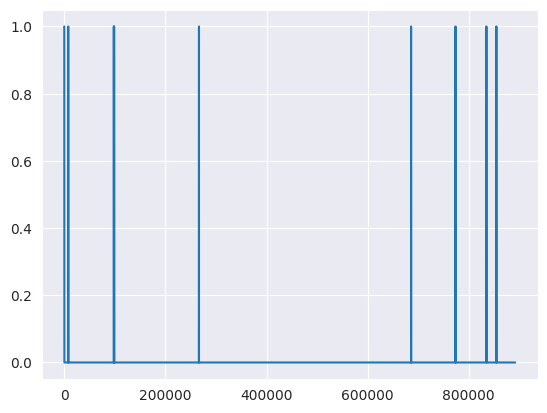

In [24]:

df['anomalie'].plot()

In [15]:
import pandas as pd
from sklearn.cluster import KMeans
df = pd.read_csv('../../datas/E4_3/E3_all_alert.csv', sep=',')
#df = df[df['datetime'] >= '2025-06-06 00:47:00']

In [16]:
len(df)

891762

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
#df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert.csv' , sep=',')
# df['indicator'] = (
#     df['ecart_temp_C1'].abs() +
#     df['ecart_temp_C2'].abs() +
#     df['ecart_temp_C3'].abs() +
#     df['ecart_temp_C4_C'].abs() +
#     df['ecart_temp_C4_F'].abs()
# )

#df  =df.drop(columns=['alerte_panne_2'])
# Appliquer KMeans (2 groupes ici)
df = df[df['datetime'] >= '2025-06-06 00:47:00']
cols = [
    'TEMPERATURE_MEG_FROID [R]_C4',
    'TEMPERATURE_MEG_CHAUD [R]_C4',
    'anomalie',
    'indicator'

]


from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[cols] = scaler.fit_transform(df[cols])


kmeans = KMeans(n_clusters=2, random_state=42)
df['alerte_panne'] = kmeans.fit_predict(df[cols])
#df.to_csv('../datas/ECOLAB_3/E3_all_alert_cluster_2.csv', index=False)

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print("Centroïdes shape:", centroids.shape)
print("Inertie :", kmeans.inertia_)
print("Itérations :", kmeans.n_iter_)


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
distances_to_centroids = np.min(cdist(df[cols], centroids), axis=1)
df['distance_to_centroid'] = distances_to_centroids
# Moyennes par cluster
print("\n📊 Moyennes des variables par cluster :")
print(df.groupby('alerte_panne').mean(numeric_only=True))

In [ ]:
from sklearn.metrics import pairwise_distances_argmin_min
closest, min_distances = pairwise_distances_argmin_min(centroids, df[cols])
print("\n📍 Index des points les plus proches de chaque centroïde :", closest)

In [ ]:
# Détection des changements de cluster
df['changement_de_cluster'] = df['alerte_panne'].diff().fillna(0).ne(0).astype(int)

In [ ]:
df[''].plot()

In [ ]:
for ligne in labels:
    print(ligne)

In [ ]:
df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert_copy.csv')
len(df)

In [ ]:
df.columns

In [1]:
import matplotlib.dates as mdates
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('../../Brain013/data_raw/to_sample/data_train.csv', sep=',', low_memory=False)
#df['datetime'] = pd.to_datetime(df['datetime'])
#
#df = df[df['datetime'] >= '2025-06-13 00:47:00']
#df = df[df['datetime'] <= '2025-06-13 24:00:00']

plt.figure(figsize=(14, 6))


#df = df.iloc[200_000:400_000]
# Mapper une couleur par cluster
#df = df[df['anomalie']==1]
colors =  df['anomalie'].map({
    0: 'green',
    1: 'red',
    2: 'blue',
    3: 'orange',
    4: 'purple',
    5: 'brown',
    6: 'pink',
    7: 'gray',
    8: 'yellow',
    9: 'cyan',
    10: 'magenta',
    11: 'lime',
    12: 'gold',
    13: 'darkblue',
    14: 'crimson',
    15: 'darkgreen',
    16: 'teal',
    17: 'navy',
    18: 'olive',
    19: 'maroon',
    20: 'darkorange',
    21: 'indigo'

}).fillna('gray')



plt.scatter(df.index, df['TEMPERATURE_REPRISE [R]_C1'], c=colors, label='', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_CONSIGNE [R]_C1'], c=colors, label='T__MEG_FROID C4 (panne=1 → violet, 0 → marron)', alpha=0.5,# s=2)

plt.title('Alerte Panne')


plt.xlabel(df['datetime'])
plt.legend()
plt.grid(True)
plt.show()

KeyError: 'anomalie'

<Figure size 1400x600 with 0 Axes>

In [2]:
len(df)

415263

In [3]:
dates_anomalies = df.loc[df['anomalie'] == 1, 'datetime']
for date in dates_anomalies:

    print(date)

KeyError: 'anomalie'

In [25]:
dates_a_marquer = [
    '2025-06-13 15:20:33',
    '2025-06-13 15:20:34',
    '2025-06-13 15:20:39',
    '2025-06-13 15:20:44',
    '2025-06-13 15:20:49',
    '2025-06-13 15:20:50',
    '2025-06-13 15:20:53',
    '2025-06-13 15:20:55',
    '2025-06-13 15:50:41',
    '2025-06-13 15:50:42',
    '2025-06-13 15:50:47',
    '2025-06-13 15:50:50',
    '2025-06-13 15:50:58',
    '2025-06-13 15:51:01'
]

# Convertir les dates en datetime si nécessaire
dates_a_marquer = pd.to_datetime(dates_a_marquer)

# S'assurer que la colonne est bien en datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Mettre anomalie = 2 pour les dates spécifiques
df.loc[df['datetime'].isin(dates_a_marquer), 'anomalie'] = 2

<Axes: >

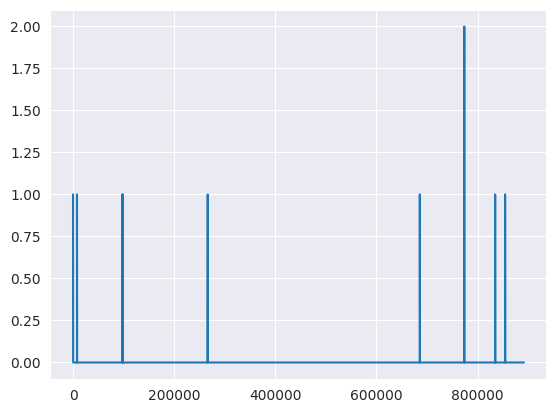

In [26]:
df['anomalie'].plot()

In [28]:
df.to_csv('../datas/E4_3/E3_all_alert_panne.csv', index=False)

In [27]:
len(df)

891762

<Axes: >

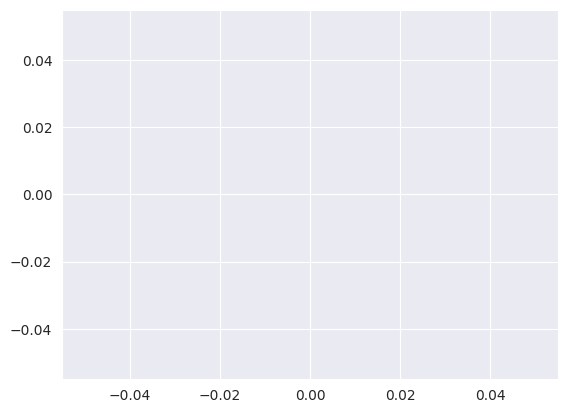

In [6]:
df['anomalie'].plot()

In [6]:
df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert_cluster.csv' , sep=',' , low_memory=False)

In [30]:
df['indicator'].plot()

KeyError: 'indicator'

<Axes: >

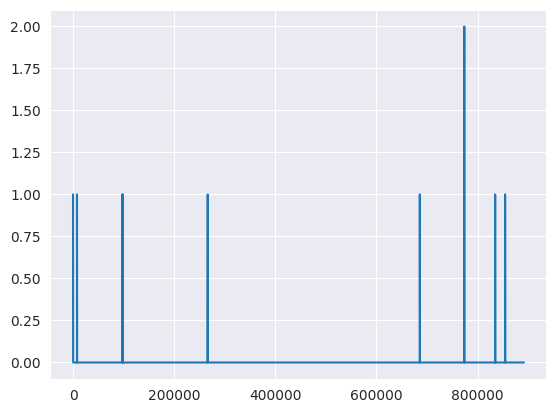

In [32]:
df['anomalie'].plot()

In [ ]:
len(df)

In [ ]:
for date in df['datetime']:
    print(date)

In [29]:
for col in df.columns:
    print(col)

Unnamed: 0
datetime
BP [R]_C1
HP [R]_C1
O2 [R]_C1
CO2 [R]_C1
O2_MMOL [R]_C1
POIDS_1 [R]_C1
POIDS_2 [R]_C1
POIDS_3 [R]_C1
CO2_MMOL [R]_C1
DEFAUT_BP [B]_C1
DEFAUT_HP [B]_C1
A_SECONDES [I]_C1
IRRADIANCE [I]_C1
REARMEMENT [B]_C1
ARU_CELLULE [B]_C1
CONSIGNE_O2 [I]_C1
Etat_Mesure [B]_C1
POIDS_TOTAL [R]_C1
BALLON_CHAUD [R]_C1
BALLON_FROID [R]_C1
CONSIGNE_CO2 [I]_C1
MA_VARIATEUR [B]_C1
COMPRESSEUR_1 [B]_C1
COMPRESSEUR_2 [B]_C1
POMPE_INF_ECO [B]_C1
POMPE_SUP_ECO [B]_C1
PPM_O2_HUMIDE [R]_C1
V2V_AIR_VICIE [B]_C1
V2V_EAU_PLUIE [I]_C1
HAUTEUR_ECOLUX [I]_C1
HUMIDIFICATEUR [I]_C1
POMPE_FOND_ECO [B]_C1
PPM_CO2_HUMIDE [I]_C1
V2V_DESHUMIDIF [B]_C1
VANNE_PROP_INF [I]_C1
VANNE_PROP_SUP [I]_C1
FERMETURE_PORTE [B]_C1
MOLE_O2_DERIVEE [R]_C1
POMPE_UTA_CHAUD [B]_C1
POMPE_UTA_FROID [B]_C1
V2V_CAPTAGE_CO2 [B]_C1
VANNE_PROP_FOND [I]_C1
VANNE_UTA_CHAUD [I]_C1
VANNE_UTA_FROID [I]_C1
VENTILATEUR_CTA [B]_C1
MOLE_CO2_DERIVEE [R]_C1
ORIGINE_COLONNES [B]_C1
V2V_INJECTION_N2 [B]_C1
V2V_INJECTION_O2 [B]_C1
V2V_INJ_AIR_NEU

In [1]:
import pandas as pd
df = pd.read_csv('../../datas/E4_3/E3_all_alert_panne_indicator.csv', sep=',')

In [126]:
df.head

<bound method NDFrame.head of                    datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  CO2 [R]_C1  \
0       2025-04-07 10:28:44   0.000000   0.000000        0.0         0.0   
1       2025-04-07 10:28:50 -14.528214  33.102051  1638300.0       359.0   
2       2025-04-07 10:28:53 -14.528214  33.102051  1638300.0       359.0   
3       2025-04-07 10:29:00 -14.528214  33.102051  1638300.0       359.0   
4       2025-04-07 10:29:04 -14.528214  33.102051  1638300.0       359.0   
...                     ...        ...        ...        ...         ...   
891757  2025-06-30 11:59:29  14.362375  27.909761  1638300.0       348.0   
891758  2025-06-30 11:59:59  14.362375  27.909761  1638300.0       348.0   
891759  2025-06-30 12:00:29  14.362375  27.909761  1638300.0       348.0   
891760  2025-06-30 12:00:59  14.362375  27.909761  1638300.0       348.0   
891761  2025-06-30 12:01:29  14.362375  27.909761  1638300.0       348.0   

        O2_MMOL [R]_C1  POIDS_1 [R]_C1  POIDS_2 [R]_C1  P

In [99]:
# Crée d'abord la colonne indicators à 0
df["indicators"] = 0

# Trouve les index où anomalie == 2
anom_idx = df.index[df["anomalie"] == 2]

# Décale de -10 (10 lignes avant)
target_idx = anom_idx - 200

# Filtre pour éviter les index négatifs
target_idx = target_idx[target_idx >= 0]

# Mets 1 à ces positions
df.loc[target_idx, "indicators"] = 1


In [43]:
df.loc[(df["indicators"] == 1) & (df["anomalie"] != 2), "anomalie"] = 3



In [128]:
len(df)

891762

In [129]:
df_train = df.iloc[0:700_000]

In [130]:
df_test = df.iloc[700_000:]

In [132]:
len(df_test)

191762

In [133]:
df_test.to_csv('../datas/E4_3/anomalie_2/data_test.csv', index=False)

In [134]:
df_train.to_csv('../datas/E4_3/anomalie_2/data_train.csv', index=False)

<Axes: >

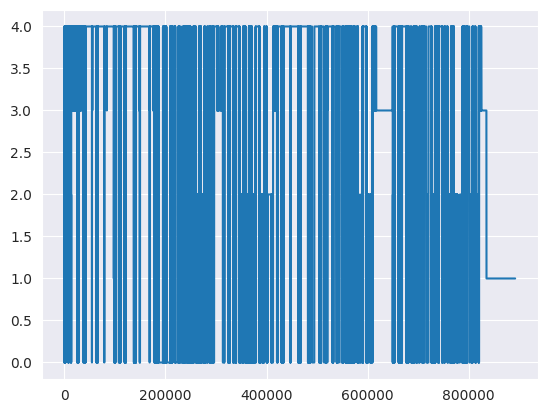

In [127]:
df['cluster'].plot()

In [10]:
di = df[df['indicators'] ==1]
da = df[df['anomalie'] ==2]

In [13]:
da.head

<bound method NDFrame.head of         Unnamed: 0             datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  \
773686      773686  2025-06-13 15:20:33   0.000000   0.000000        0.0   
773687      773687  2025-06-13 15:20:34   0.000000   0.000000        0.0   
773688      773688  2025-06-13 15:20:39 -11.129303  50.220543  1638300.0   
773689      773689  2025-06-13 15:20:44 -11.129303  50.220543  1638300.0   
773690      773690  2025-06-13 15:20:49 -11.129303  50.220543  1638300.0   
773691      773691  2025-06-13 15:20:50 -11.129303  50.220543  1638300.0   
773692      773692  2025-06-13 15:20:53 -11.129303  50.220543  1638300.0   
773693      773693  2025-06-13 15:20:55 -11.129303  50.220543  1638300.0   
773811      773811  2025-06-13 15:50:41   0.000000   0.000000        0.0   
773812      773812  2025-06-13 15:50:42   0.000000   0.000000        0.0   
773813      773813  2025-06-13 15:50:47  -7.838324  47.471207  1638300.0   
773814      773814  2025-06-13 15:50:50  -7.838324  47.471

In [14]:
di.head

<bound method NDFrame.head of         Unnamed: 0             datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  \
773676      773676  2025-06-13 15:16:49 -12.197917  47.064320  1638300.0   
773677      773677  2025-06-13 15:16:50 -12.197917  47.064320  1638300.0   
773678      773678  2025-06-13 15:16:51  -7.749630  47.706234  1638300.0   
773679      773679  2025-06-13 15:16:52  -7.749630  47.706234  1638300.0   
773680      773680  2025-06-13 15:16:53  -7.749630  47.706234  1638300.0   
773681      773681  2025-06-13 15:17:20  -7.749630  47.706234  1638300.0   
773682      773682  2025-06-13 15:17:21  -7.617086  48.199478  1638300.0   
773683      773683  2025-06-13 15:17:22  -7.617086  48.199478  1638300.0   
773801      773801  2025-06-13 15:46:06  -9.435902  47.011623  1638300.0   
773802      773802  2025-06-13 15:46:09  -9.435902  47.011623  1638300.0   
773803      773803  2025-06-13 15:46:10  -9.435902  47.011623  1638300.0   
773804      773804  2025-06-13 15:46:14  -9.435902  47.011

In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



X = df[[
     'DEBIT_BP [B]_C4',
        'DEBIT_HP [B]_C4',
       'TEMPERATURE_MEG_CHAUD [R]_C4',
        'TEMPERATURE_MEG_FROID [R]_C4',

    'BP_R134_EN_BARS [R]_C4',
    'BP_R134_EN_DEGRES [R]_C4',
        'HP_R134_EN_BARS [R]_C4',
    'HP_R134_EN_DEGRES [R]_C4',


   # 'day_cos',
    #'day_sin',
    'CONSIGNE_BALLON_CHAUD [R]_C4',
    'CONSIGNE_BALLON_FROID [R]_C4',

    'TEMPERATURE_REPRISE [R]_C1',
    'TEMPERATURE_REPRISE [R]_C2',
    'TEMPERATURE_REPRISE [R]_C3',

    'TEMPERATURE_RETOUR_CHAUD [R]_C1',
    'TEMPERATURE_RETOUR_CHAUD [R]_C2',
    'TEMPERATURE_RETOUR_CHAUD [R]_C3',

    'TEMPERATURE_CONSIGNE [R]_C1',
    'TEMPERATURE_CONSIGNE [R]_C3',
    'TEMPERATURE_CONSIGNE [R]_C2',
    #
    'HYGROMETRIE_CONSIGNE [I]_C1',
    'HYGROMETRIE_CONSIGNE [I]_C2',
    'HYGROMETRIE_CONSIGNE [I]_C3',

    # 'CONSIGNE_CO2 [I]_C1',
    # 'CONSIGNE_CO2 [I]_C2',
    # 'CONSIGNE_CO2 [I]_C3',

    # 'CONSIGNE_O2 [I]_C1',
    # 'CONSIGNE_O2 [I]_C2',
    # 'CONSIGNE_O2 [I]_C3',
    #
    # 'CONSIGNE_VENTILATION [I]_C1',
    # 'CONSIGNE_VENTILATION [I]_C2',


    # 'TEMPERATURE_SOUFFLAGE [R]_C2',
    # 'TEMPERATURE_SOUFFLAGE [R]_C1',
    # 'TEMPERATURE_SOUFFLAGE [R]_C3',
    #
    # 'HYGROMETRIE_CELLULE [R]_C1',
    # 'HYGROMETRIE_CELLULE [R]_C2',
    # 'HYGROMETRIE_CELLULE [R]_C3',

    # 'CONSIGNE_ECLAIRAGE [I]_C1',
    # 'CONSIGNE_ECLAIRAGE [I]_C2',
    # 'CONSIGNE_ECLAIRAGE [I]_C3',
    #
    # 'CONSIGNE_TEMP_FOND [R]_C1',
    # 'CONSIGNE_TEMP_FOND [R]_C2',
    # 'CONSIGNE_TEMP_FOND [R]_C3',

    # 'day_sin',
    # 'day_cos'

    # 'ecart_temp_C4_C',
    # 'ecart_temp_C4_F',
    #
    # 'indicator',
    'ecart_temp_C1',
    'ecart_temp_C2',
    'ecart_temp_C3',
    'ecart_temp_C4_C',
    'ecart_temp_C4_F',

   # 'CDE_DEGIVRAGE [B]_C4',
   #  'CDE_EVAPO_FROID [B]_C4',
   #  'CDE_EVAPO_CHAUD [B]_C4',
   #
   #  'CDE_CONDENSEUR [B]_C4',
   #  'CDE_EVAPORATEUR [B]_C4',
   #
    # 'DEFAUT_COMPRESSEUR_HP [B]_C4',
    # 'DEFAUT_COMPRESSEUR_BP [B]_C4',
    # 'DEFAUT_COMPRESSEUR_1 [B]_C4',
    # 'DEFAUT_COMPRESSEUR_2 [B]_C4',
    # 'SECURITE_GENERALE [B]_C4'

]]
y = df['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Évaluation*
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(mae)
print(mse)
print(r2)
print(classification_report(y_test, y_pred))

0.0018502632419976114
0.007109496335918095
0.9976074077083422
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     47079
           1       1.00      1.00      1.00     11290
           2       1.00      1.00      1.00     12708
           3       1.00      1.00      1.00     17090
           4       1.00      1.00      1.00     90186

    accuracy                           1.00    178353
   macro avg       1.00      1.00      1.00    178353
weighted avg       1.00      1.00      1.00    178353



In [117]:
df_train = pd.concat([X_train, y_train] , axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [121]:
len(df_train)

713409

In [119]:
len(df_test)

178353

In [120]:
df_train.to_csv('../datas/E4_3/anomalies/data_train.csv' , index=False)

In [122]:
df_test.to_csv('../datas/E4_3/anomalies/data_test.csv' , index=False)

In [45]:
df = df.drop(columns=['Unnamed: 0'])

In [47]:
df.columns

Index(['datetime', 'BP [R]_C1', 'HP [R]_C1', 'O2 [R]_C1', 'CO2 [R]_C1',
       'O2_MMOL [R]_C1', 'POIDS_1 [R]_C1', 'POIDS_2 [R]_C1', 'POIDS_3 [R]_C1',
       'CO2_MMOL [R]_C1',
       ...
       'ecart_temp_C3', 'alerte_temp_C3', 'cluster_All', 'ecart_temp_C4_C',
       'ecart_temp_C4_F', 'seconds_in_day', 'day_sin', 'day_cos', 'anomalie',
       'indicators'],
      dtype='object', length=371)

In [48]:
df.to_csv('../datas/E4_3/E3_all_alert_panne_indicator.csv', index=False)

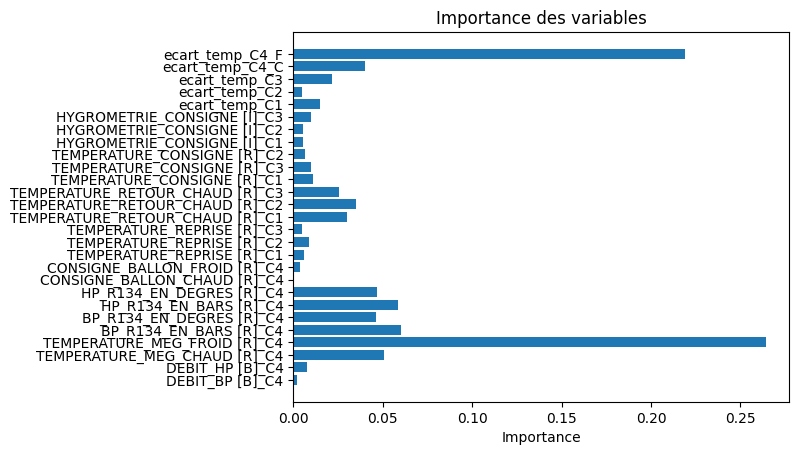

In [95]:
import matplotlib.pyplot as plt
importances = model.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

In [ ]:
for i in range(len(importances)):
    if importances[i] > 1.0:
        print(features[i], importances[i])

In [ ]:
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Garder uniquement les 10 premières
top = df_importances.head(15)

# Afficher les résultats
print(top)

In [ ]:
top['Feature']

In [ ]:
from sklearn.cluster import KMeans


features = df[top['Feature']]
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster_New'] = kmeans.fit_predict(df[top['Feature']])

In [ ]:
df = df.iloc[28_000:40000]
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Mapper une couleur par cluster
colors = df['cluster_New'].map({1: 'red', 0: 'green'})
colors_2 = df['cluster_New'].map({1: 'purple', 0: 'brown'})
#colors_3 = df['cluster'].map({1: 'purple', 0: 'brown'})
#colors_4 = df['cluster'].map({1: 'yellow', 0: 'white'})

# Tracer chaque variable (sur le même graphique) avec la couleur correspondant au cluster

#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors, label='Prob-Reprise', alpha=1.0, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_SUP [R]'], c=colors_2, label='Prob-Consigne', alpha=1.0, s=2)
plt.scatter(df.index, df['TEMPERATURE_REPRISE [R]_C1'], c=colors, label='Normal', alpha=0.5, s=2)
plt.scatter(df.index, df['TEMPERATURE_CONSIGNE [R]_C1'], c=colors_2, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_RETOUR_CHAUD [R]_C3'], c=colors, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_ALLER_CHAUD [R]_C1'], c=colors, label='Normal', alpha=0.5, s=2)

#plt.scatter(df.index, df['V2V_CIRCULATION_AIR [B]_C3'], c=colors_2, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_MOY_INF [R]'], c=colors_3, label='Prob-Consigne', alpha=1.0, s=2)
#plt.scatter(df.index, df['alerte_pred'], c=colors_4, label='Prob-Consigne', alpha=1.0, s=2)
plt.title('Cluster All')
plt.xlabel('Index')
plt.ylabel('Temperature Reprise + consigne' )
plt.legend()
plt.grid(True)
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('../../datas/E4_3/anomalie_2/data_train.csv', sep=',')

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

features = [

  'TEMPERATURE_CONSIGNE [R]_C1'
  #   'TEMPERATURE_CONSIGNE [R]_C2',
  #   'TEMPERATURE_CONSIGNE [R]_C3',

    # 'TEMPERATURE_MEG_FROID [R]_C4',
    # 'TEMPERATURE_MEG_CHAUD [R]_C4',
    #
    # 'TEMPERATURE_REPRISE [R]_C1',
    # 'TEMPERATURE_REPRISE [R]_C2',
    # 'TEMPERATURE_REPRISE [R]_C3',


    # 'CONSIGNE_BALLON_FROID [R]_C4',
    # 'CONSIGNE_BALLON_CHAUD [R]_C4',
    #
    # 'HYGROMETRIE_CONSIGNE [I]_C1',
    # 'HYGROMETRIE_CONSIGNE [I]_C2',
    # 'HYGROMETRIE_CONSIGNE [I]_C3',
]

# Séparation des features et du label
X = df[features]  #.drop(columns=['datetime' , 'cluster'])#[features]
y = df[['cluster']]

# Split en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraînement du modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédiction et évaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/home/octopus/octobrain/.venv/lib/python3.11/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


              precision    recall  f1-score   support

           0       0.54      0.42      0.47     37320
           1       0.00      0.00      0.00        10
           2       0.51      0.26      0.34      7970
           3       0.88      0.65      0.75     13569
           4       0.70      0.84      0.76     81131

    accuracy                           0.67    140000
   macro avg       0.53      0.43      0.46    140000
weighted avg       0.66      0.67      0.66    140000



/home/octopus/octobrain/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/octopus/octobrain/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/octopus/octobrain/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [10]:
importances = model.feature_importances_

feature_names = X.columns
plt.barh(feature_names, importances)
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.show()

NameError: name 'plt' is not defined

In [175]:
for i in range(len(importances)):
    if importances[i] > 1.0:
        print(features[i], importances[i])

In [177]:
df_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
})
df_importances = df_importances.sort_values(by='Importance', ascending=False)

# Garder uniquement les 10 premières
top = df_importances.head(30)

# Afficher les résultats
print(top)

                             Feature  Importance
321     TEMPERATURE_MEG_FROID [R]_C4    0.083035
234              BALLON_FROID [R]_C3    0.080167
364                  ecart_temp_C4_F    0.080033
19               BALLON_FROID [R]_C1    0.068273
127              BALLON_FROID [R]_C2    0.053670
105  TEMPERATURE_RETOUR_FROID [R]_C1    0.047488
318  TEMPERATURE_RETOUR_FROID [R]_C3    0.038368
99    TEMPERATURE_ALLER_FROID [R]_C1    0.036987
206   TEMPERATURE_ALLER_FROID [R]_C2    0.034315
212  TEMPERATURE_RETOUR_FROID [R]_C2    0.027760
312   TEMPERATURE_ALLER_FROID [R]_C3    0.026047
109                        HP [R]_C2    0.021827
216                        HP [R]_C3    0.019439
1                          HP [R]_C1    0.017791
324         BP_R134_EN_DEGRES [R]_C4    0.017244
233              BALLON_CHAUD [R]_C3    0.014857
363                  ecart_temp_C4_C    0.014458
327           HP_R134_EN_BARS [R]_C4    0.013426
11                 A_SECONDES [I]_C1    0.012085
108                 

In [28]:
import pandas as pd
lf = pd.read_csv('../../datas/E4_3/E3_all_alert_panne_indicator.csv', sep=',')

In [29]:
len(lf)

891762

In [33]:
for i in lf.columns:
    print(i)

datetime
BP [R]_C1
HP [R]_C1
O2 [R]_C1
CO2 [R]_C1
O2_MMOL [R]_C1
POIDS_1 [R]_C1
POIDS_2 [R]_C1
POIDS_3 [R]_C1
CO2_MMOL [R]_C1
DEFAUT_BP [B]_C1
DEFAUT_HP [B]_C1
A_SECONDES [I]_C1
IRRADIANCE [I]_C1
REARMEMENT [B]_C1
ARU_CELLULE [B]_C1
CONSIGNE_O2 [I]_C1
Etat_Mesure [B]_C1
POIDS_TOTAL [R]_C1
BALLON_CHAUD [R]_C1
BALLON_FROID [R]_C1
CONSIGNE_CO2 [I]_C1
MA_VARIATEUR [B]_C1
COMPRESSEUR_1 [B]_C1
COMPRESSEUR_2 [B]_C1
POMPE_INF_ECO [B]_C1
POMPE_SUP_ECO [B]_C1
PPM_O2_HUMIDE [R]_C1
V2V_AIR_VICIE [B]_C1
V2V_EAU_PLUIE [I]_C1
HAUTEUR_ECOLUX [I]_C1
HUMIDIFICATEUR [I]_C1
POMPE_FOND_ECO [B]_C1
PPM_CO2_HUMIDE [I]_C1
V2V_DESHUMIDIF [B]_C1
VANNE_PROP_INF [I]_C1
VANNE_PROP_SUP [I]_C1
FERMETURE_PORTE [B]_C1
MOLE_O2_DERIVEE [R]_C1
POMPE_UTA_CHAUD [B]_C1
POMPE_UTA_FROID [B]_C1
V2V_CAPTAGE_CO2 [B]_C1
VANNE_PROP_FOND [I]_C1
VANNE_UTA_CHAUD [I]_C1
VANNE_UTA_FROID [I]_C1
VENTILATEUR_CTA [B]_C1
MOLE_CO2_DERIVEE [R]_C1
ORIGINE_COLONNES [B]_C1
V2V_INJECTION_N2 [B]_C1
V2V_INJECTION_O2 [B]_C1
V2V_INJ_AIR_NEUF [B]_C1
VI

In [34]:
from sklearn.cluster import KMeans

# Appliquer KMeans (2 groupes ici)
features = [
    'TEMPERATURE_MEG_CHAUD [R]_C4',
    'TEMPERATURE_MEG_FROID [R]_C4',

]

kmeans = KMeans(n_clusters=5, random_state=42)
lf['cluster_test'] = kmeans.fit_predict(lf[features])

In [182]:
cluster_test = lf[lf['anomalie']==2]
len(cluster_test)

14

In [183]:
cluster_test.head

<bound method NDFrame.head of                    datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  CO2 [R]_C1  \
773686  2025-06-13 15:20:33   0.000000   0.000000        0.0         0.0   
773687  2025-06-13 15:20:34   0.000000   0.000000        0.0         0.0   
773688  2025-06-13 15:20:39 -11.129303  50.220543  1638300.0       452.0   
773689  2025-06-13 15:20:44 -11.129303  50.220543  1638300.0       452.0   
773690  2025-06-13 15:20:49 -11.129303  50.220543  1638300.0       452.0   
773691  2025-06-13 15:20:50 -11.129303  50.220543  1638300.0       452.0   
773692  2025-06-13 15:20:53 -11.129303  50.220543  1638300.0       452.0   
773693  2025-06-13 15:20:55 -11.129303  50.220543  1638300.0       452.0   
773811  2025-06-13 15:50:41   0.000000   0.000000        0.0         0.0   
773812  2025-06-13 15:50:42   0.000000   0.000000        0.0         0.0   
773813  2025-06-13 15:50:47  -7.838324  47.471207  1638300.0       461.0   
773814  2025-06-13 15:50:50  -7.838324  47.471207  1638300

In [92]:
lf

<bound method NDFrame.head of                    datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  CO2 [R]_C1  \
0       2025-04-07 10:28:44   0.000000   0.000000        0.0         0.0   
1       2025-04-07 10:28:50 -14.528214  33.102051  1638300.0       359.0   
2       2025-04-07 10:28:53 -14.528214  33.102051  1638300.0       359.0   
3       2025-04-07 10:29:00 -14.528214  33.102051  1638300.0       359.0   
4       2025-04-07 10:29:04 -14.528214  33.102051  1638300.0       359.0   
...                     ...        ...        ...        ...         ...   
891757  2025-06-30 11:59:29  14.362375  27.909761  1638300.0       348.0   
891758  2025-06-30 11:59:59  14.362375  27.909761  1638300.0       348.0   
891759  2025-06-30 12:00:29  14.362375  27.909761  1638300.0       348.0   
891760  2025-06-30 12:00:59  14.362375  27.909761  1638300.0       348.0   
891761  2025-06-30 12:01:29  14.362375  27.909761  1638300.0       348.0   

        O2_MMOL [R]_C1  POIDS_1 [R]_C1  POIDS_2 [R]_C1  P

In [140]:
indicaton_test = lf[lf['cluster_test']==3]

In [141]:
indicaton_test.head

<bound method NDFrame.head of Empty DataFrame
Columns: [datetime, BP [R]_C1, HP [R]_C1, O2 [R]_C1, CO2 [R]_C1, O2_MMOL [R]_C1, POIDS_1 [R]_C1, POIDS_2 [R]_C1, POIDS_3 [R]_C1, CO2_MMOL [R]_C1, DEFAUT_BP [B]_C1, DEFAUT_HP [B]_C1, A_SECONDES [I]_C1, IRRADIANCE [I]_C1, REARMEMENT [B]_C1, ARU_CELLULE [B]_C1, CONSIGNE_O2 [I]_C1, Etat_Mesure [B]_C1, POIDS_TOTAL [R]_C1, BALLON_CHAUD [R]_C1, BALLON_FROID [R]_C1, CONSIGNE_CO2 [I]_C1, MA_VARIATEUR [B]_C1, COMPRESSEUR_1 [B]_C1, COMPRESSEUR_2 [B]_C1, POMPE_INF_ECO [B]_C1, POMPE_SUP_ECO [B]_C1, PPM_O2_HUMIDE [R]_C1, V2V_AIR_VICIE [B]_C1, V2V_EAU_PLUIE [I]_C1, HAUTEUR_ECOLUX [I]_C1, HUMIDIFICATEUR [I]_C1, POMPE_FOND_ECO [B]_C1, PPM_CO2_HUMIDE [I]_C1, V2V_DESHUMIDIF [B]_C1, VANNE_PROP_INF [I]_C1, VANNE_PROP_SUP [I]_C1, FERMETURE_PORTE [B]_C1, MOLE_O2_DERIVEE [R]_C1, POMPE_UTA_CHAUD [B]_C1, POMPE_UTA_FROID [B]_C1, V2V_CAPTAGE_CO2 [B]_C1, VANNE_PROP_FOND [I]_C1, VANNE_UTA_CHAUD [I]_C1, VANNE_UTA_FROID [I]_C1, VENTILATEUR_CTA [B]_C1, MOLE_CO2_DERIVEE [R]

/tmp/ipykernel_1866658/3519423694.py:37: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


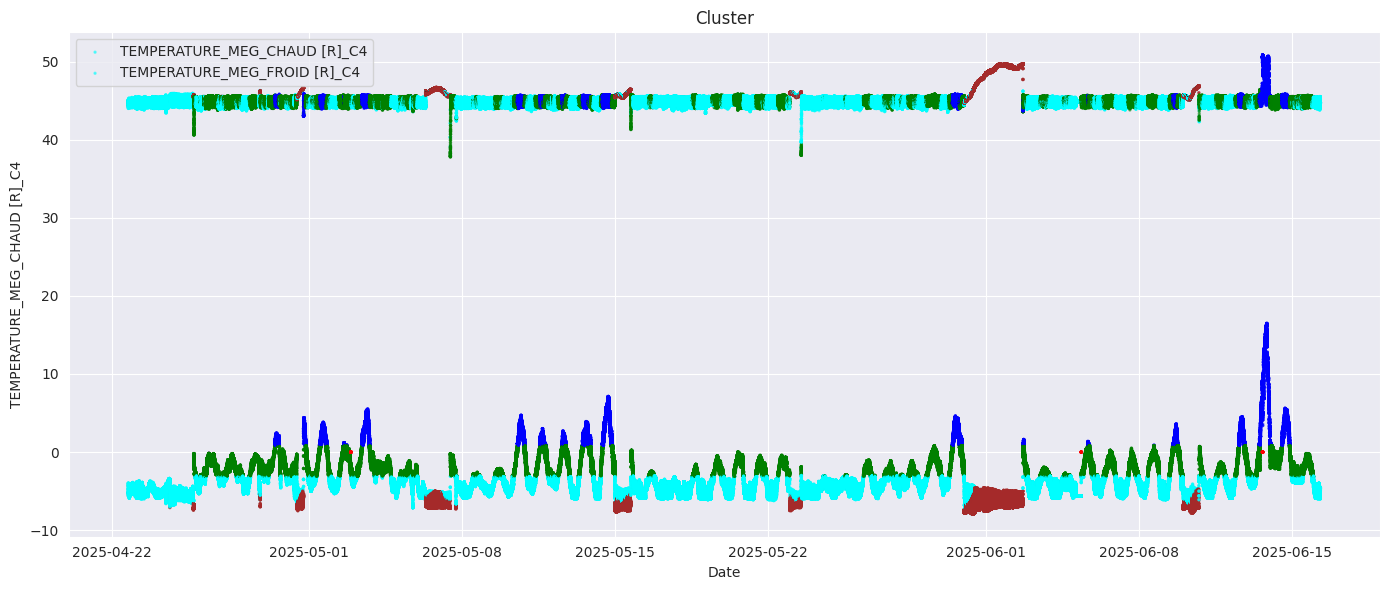

In [49]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

df = lf.iloc[150_000:800_000].copy()

if not pd.api.types.is_datetime64_any_dtype(df['datetime']):
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

plt.figure(figsize=(14, 6))

# Mapping des couleurs par cluster
colors_map = {
    0: 'cyan', 2: 'green', 1: 'red', 3: 'blue', 4: 'brown',
    5: 'black', 6: 'yellow', 7: 'pink', 8: 'purple', 9: 'orange',
    10: 'magenta', 11: 'lime', 12: 'navy', 13: 'gold', 14: 'teal',
    15: 'violet', 16: 'olive', 17: 'coral', 18: 'turquoise', 19: 'maroon'
}

colors_3 = df['cluster_test'].map(colors_map)

# Scatter plot
plt.scatter(df['datetime'],df['TEMPERATURE_MEG_CHAUD [R]_C4'],c=colors_3,label='TEMPERATURE_MEG_CHAUD [R]_C4',alpha=0.5,s=2)
plt.scatter(df['datetime'],df["TEMPERATURE_MEG_FROID [R]_C4"],c=colors_3,label="TEMPERATURE_MEG_FROID [R]_C4",alpha=0.5,s=2)
plt.title('Cluster')
plt.xlabel('Date')
plt.ylabel('TEMPERATURE_MEG_CHAUD [R]_C4')
plt.legend()
plt.grid(True)

# if pd.api.types.is_datetime64_any_dtype(df['datetime']):
#     ax = plt.gca()
#     ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
#     ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#     plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [114]:
df.head

<bound method NDFrame.head of                    datetime  BP [R]_C1  HP [R]_C1  O2 [R]_C1  CO2 [R]_C1  \
773686  2025-06-13 15:20:33   0.000000   0.000000        0.0         0.0   
773687  2025-06-13 15:20:34   0.000000   0.000000        0.0         0.0   
773688  2025-06-13 15:20:39 -11.129303  50.220543  1638300.0       452.0   
773689  2025-06-13 15:20:44 -11.129303  50.220543  1638300.0       452.0   
773690  2025-06-13 15:20:49 -11.129303  50.220543  1638300.0       452.0   
773691  2025-06-13 15:20:50 -11.129303  50.220543  1638300.0       452.0   
773692  2025-06-13 15:20:53 -11.129303  50.220543  1638300.0       452.0   
773693  2025-06-13 15:20:55 -11.129303  50.220543  1638300.0       452.0   
773811  2025-06-13 15:50:41   0.000000   0.000000        0.0         0.0   
773812  2025-06-13 15:50:42   0.000000   0.000000        0.0         0.0   
773813  2025-06-13 15:50:47  -7.838324  47.471207  1638300.0       461.0   
773814  2025-06-13 15:50:50  -7.838324  47.471207  1638300

In [87]:
lf['cluster'] = lf['cluster_test']

In [88]:
lf = lf.drop(columns=['cluster_test'])

In [89]:
lf.to_csv('../datas/E4_3/E3_all_alert_panne_indicator.csv' , index=False)

In [ ]:
import seaborn as sns
sns.scatterplot(data=df,
                x=df.index,
                y='CDE_CONDENSEUR [B]_C4',
                hue='alerte_temp_C1')

In [30]:
df.to_csv('../datas/E4_3/test_cluster/test_cluster.csv', index=False)

In [ ]:
for col in df.columns:
    print(col)

In [ ]:
from sklearn.cluster import KMeans
features = [
   'alerte_temp_C1' ,
    'alerte_temp_C2' ,
    'alerte_temp_C3' ,
    'CDE_CONDENSEUR [B]_C4',
    'CDE_EVAPORATEUR [B]_C4',
    
    'CDE_EVAPO_BP_FROID [B]_C4',
    'CDE_VENTILATEUR_EVAPO [B]_C4',
   
    'CDE_COMPRESSEUR1 [B]_C4',
    'CDE_COMPRESSEUR2 [B]_C4',
    'HP_R134_EN_BARS [R]_C4'
]


kmeans = KMeans(n_clusters=2, random_state=3042)
df['cluster_New'] = kmeans.fit_predict(df[features])

In [ ]:
df = pd.read_csv('../datas/ECOLAB_3/E3_all_alert.csv' , sep=',' )

In [ ]:
#import matplotlib.pyplot as plt
df = df.iloc[0:]
plt.figure(figsize=(14, 6))

# Mapper une couleur par cluster
colors = df['CDE_EVAPORATEUR [B]_C4'].map({1: 'red', 0: 'green' , 2 : 'blue' , 3:'brown'})
colors_2 = df['cluster_New'].map({1: 'purple', 0: 'brown' , 2 : 'cyan' ,3:'black'})
colors_3 = df['cluster_New'].map({1: 'crimson', 0: 'darkcyan', 2 : 'white' ,3:'pink'})
#colors_4 = df['cluster_All'].map({1: 'orangered', 0: 'royalblue'})


#plt.scatter(df.index, df['CONSIGNE_BALLON_FROID [R]_C4'], c=colors, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['CDE_CONDENSEUR [B]_C4'], c=colors_3, label='Normal', alpha=0.5, s=2)
plt.scatter(df.index, df['ecart_temp_C1'], c=colors, label='Normal', alpha=0.5, s=2)
#plt.scatter(df.index, df['TEMPERATURE_CONSIGNE [R]_C1'], c=colors, label='Normal', alpha=0.5, s=2)

#plt.scatter(df.index, df['CONSIGNE_BALLON_FROID [R]_C4'], c=colors_3, label='Normal', alpha=0.5, s=2)
plt.title('Cluster All')
plt.xlabel('Index')
plt.ylabel('Temperature Reprise + consigne' )
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
df = pd.read_csv('../datas/ECOLAB_3/C4/C4_1.csv' , sep=',')

In [ ]:
df.columns

In [ ]:
df = df[df['datatime'] >= '2025-06-13 15:17:00']
df = df[df['datatime'] <= '2025-06-13 15:56:00']
for lig in df['TEMPERATURE_MEG_FROID [R]']:
    print([lig])